<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Ingenieurinformatik – Übung</h1>
        Lehrstuhl <b>Computational Civil Engineering</b><br>
        Kontakt: <a href = "mailto: cce-inginf@uni-wuppertal.de">Email senden</a> | Individuelle Kontakte siehe Webseite des Lehrstuhls<br>
        Links: 
        <a href="cce.uni-wuppertal.de/inginf">Vorlesungsskript</a> | 
        <a href="cce.uni-wuppertal.de/">Webseite des Lehrstuhls</a>
    </div>
    <div style="float:right;"> 
        <img src="../../logo_cce_combined.png" style="width:150px;"/>
    </div>
</div>

# Aufgabe 4.2 – Monte Carlo Integration

Monte Carlo Simulationen kommen in unterschiedlichen Bereichen der numerischen Mathematik und Physik vor. In dieser Aufgabe werden Sie die Monte Carlo Integration benutzen, um $\pi$ zu approximieren. 

Um die Funktionsweise zu verstehen, schauen Sie sich den Kreis in dem Quadrat an. Wenn Sie zufällige, gleichverteilte Punkte generieren, die immer innerhalb des Quadrates liegen, dann ist das Verhältnis von den Punkten, die innerhalb des Kreises liegen, zu allen generierten Punkte eine Näherung für das Verhältnis vom Flächeninhalt des Kreises zum Flächeninhalt des Quadrats. Da Sie dieses Verhältnis auch analytisch berechnen können, können Sie die numerische Lösung mit der analytischen gleichsetzen und nach $\pi$ auflösen, um eine Nährung für $\pi$ zu erhalten.

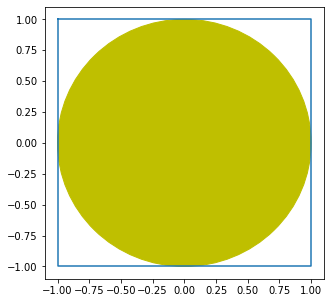

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))

square_x = [-1, -1, 1, 1, -1]
square_y = [1, -1, -1, 1, 1]
circle = plt.Circle((0, 0), 1, color='y')

ax = plt.gca()

ax.add_artist(circle)

plt.plot(square_x, square_y)
plt.show()

## Aufgabenstellung

### Aufgabenteil A

Schreiben Sie eine Funktion, die $\pi$ durch die Monte Carlo Integration annährt. Sie können sich an folgenden Schritten orientieren:
1. Es soll die Anzahl der zu generierenden Punkte (N) als Parameter an die Funktion übergeben werden
1. Generieren Sie zwei Zufalszahlen (x- und y-Wert) im Intervall [-1,1]
1. Überprüfen Sie, ob der generierte Punkt innerhalb des Einheitskreises liegt
1. Wenn ja, erhöhen Sie einen Zähler um 1
1. Wiederholen Sie die Schritte 2.-4. N-mal
1. Approximieren Sie aus dem Verhältnis Zähler/N $\pi$
1. Geben Sie $\pi$ zurück


### Aufgabenteil B

Plotten Sie die absolute Differenz zwischen Ihrem approximierten $\pi$ und numpy.pi doppelt logarithmisch für alle Zehnerpotenzen zwischen 10 und 100.000. Was sagt ihnen der Graph? Fühern Sie das Programm ein paarmal aus. Wieso verändert sich der Graph? 

## Lösungsvorschlag

### Aufgabenteil A

Berechnung von Pi:
$$ \frac{\text{# Treffer}}{\text{# Versuche}} \approx \frac{\pi r²}{2²}\\
\Rightarrow \pi \approx 4 \frac{\text{# Treffer}}{\text{# Versuche}}$$

Die Funktion:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def pi_func(N):
    kreis_zaehler = 0
    for i in range(N):
        point = np.random.random(2)*2 - 1
        if point[0]**2 + point[1]**2 < 1:
            kreis_zaehler += 1
    return 4 * kreis_zaehler/N

### Aufgabenteil B

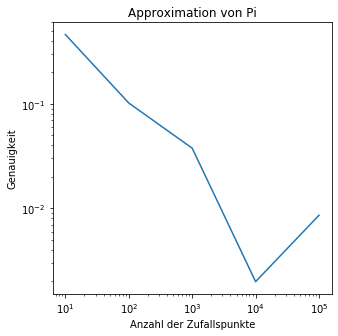

In [5]:
pi = []
pi_diff = []
x = [10, 100, 1000, 10000, 100000]

for i in x:
    pi.append(pi_func(i))
    pi_diff.append(np.abs(pi[-1] - np.pi))
    

plt.figure(figsize=(5,5))

plt.title('Approximation von Pi')
plt.xlabel('Anzahl der Zufallspunkte')
plt.ylabel('Genauigkeit')

plt.loglog(x, pi_diff)

plt.show()

Jeder Punkt ist die Differenz zwischen dem genährten $\pi$ aus einem Zufallsexperiment und $\pi$. Ein neuer Programmdurchlauf führt zu einem neuen Zufallsexperiment mit einem potenziell anderen Ergebnis.